# Modelos Preditivos e Séries Temporais

## Objetivos
Exercitar os seguintes conceitos trabalhados no Módulo:
- Análise exploratória de dados (EDA - Exploratory Data Analysis).
- Comparação e treinamento de modelos de classificação.

## Enunciado
Neste desafio, serão abordados conceitos apresentados durante a disciplina Modelos
Preditivos e Séries Temporais (MPT). Será utilizado o dataset “Banknote authentication”,
disponível no UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/banknote+authentication).
Este dataset consiste em atributos contínuos (variance, skewness, curtosis e entropy)
extraídos de imagens de cédulas reais e falsificadas através de uma etapa de
processamento de sinais (transformação de Wavelet), além da indicação se o exemplo é
de uma cédula genuína (class = 0) ou falsificada (class = 1).

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt',
                 header=None,
                 names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [ ]:
# Importanto bibliotecas adicionais para a análise
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de treinamento
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Importa o classificador árvore de decisão
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

from matplotlib.colors import ListedColormap
import matplotlib

## Análise exploratória

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# Visualizando os tipos de dados
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [ ]:
# Verificando se há dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
# Dimensões do dataset
df.shape

(1372, 5)

In [ ]:
# Variável com maior range 
range_variance = df['variance'].max() - df['variance'].min()
range_skewness = df['skewness'].max() - df['skewness'].min()
range_curtosis = df['curtosis'].max() - df['curtosis'].min()
range_entropy = df['entropy'].max() - df['entropy'].min()

print("Ranges de cada coluna.\nvariance -> {}\nskewness ->{}\ncurtosis -> {}\nentropy -> {}".format(range_variance,range_skewness, range_curtosis, range_entropy))

Ranges de cada coluna.
variance -> 13.8669
skewness ->26.7247
curtosis -> 23.2135
entropy -> 10.9977


In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
# Relação entre cédulas falsas (class=1) e cédulas verdadeiras (class=0)
df_classe1 = df[df['class']==1]
# Número de classes do tipo 1 em porcentagem
(df_classe1.shape[0] / df.shape[0]) * 100

44.460641399416915

In [ ]:
# Matriz de correlação dos dados

# Coeficiente de correlação de Pearson
df.corr(method='pearson').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)  # Verifica a correlação entre os dados


,variance,skewness,curtosis,entropy,class
variance,1.0,0.26403,-0.38085,0.27682,-0.72484
skewness,0.26403,1.0,-0.7869,-0.52632,-0.44469
curtosis,-0.38085,-0.7869,1.0,0.31884,0.15588
entropy,0.27682,-0.52632,0.31884,1.0,-0.023424
class,-0.72484,-0.44469,0.15588,-0.023424,1.0


## Divisão do conjunto de treino e teste 

In [ ]:
# Dados de entrada
X = df.iloc[:,:4].values
# Dados/Classes de saída
y = df.iloc[:, 4].values

In [ ]:
# Divisão entre conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

In [ ]:
'''
# Normalização das varáveis
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
'''

'\n# Normalização das varáveis\nfrom sklearn.preprocessing import StandardScaler\n\nscale = StandardScaler()\nX_train = scale.fit_transform(X_train)\nX_test = scale.transform(X_test)\n'

## Modelo KNN

In [ ]:
# Fit no modelo
n = 5
clf_knn = KNeighborsClassifier(n_neighbors=n)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predição no conjunto de teste
y_predKNN = clf_knn.predict(X_test)

In [ ]:
# Report de classificação
print(classification_report(y_test, y_predKNN, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       229
           1   1.000000  1.000000  1.000000       183

    accuracy                       1.000000       412
   macro avg   1.000000  1.000000  1.000000       412
weighted avg   1.000000  1.000000  1.000000       412



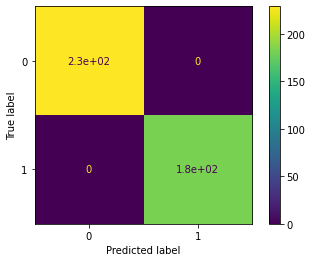

In [ ]:
# Matriz de confusão KNN
plot_confusion_matrix(clf_knn, X_test, y_test);

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.5f}'.format(float(clf_knn.score(X_test, y_test))))


Neste modelo obtivemos uma porcentagem de acertos de 1.00000


## Modelo Árvore de Decisão

In [ ]:
# Treinando o modelo
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Predição
y_predArvore = clf_arvore.predict(X_test)

In [ ]:
# Report de classificação
print(classification_report(y_test, y_predArvore, digits=5))

              precision    recall  f1-score   support

           0    0.98678   0.97817   0.98246       229
           1    0.97297   0.98361   0.97826       183

    accuracy                        0.98058       412
   macro avg    0.97988   0.98089   0.98036       412
weighted avg    0.98065   0.98058   0.98059       412



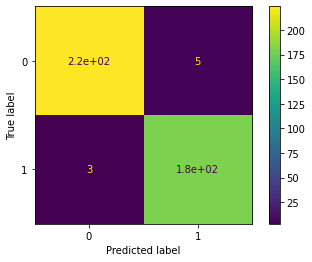

In [ ]:
# Matriz de confusão Árvore
plot_confusion_matrix(clf_arvore, X_test, y_test);

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.5f}'.format(float(clf_arvore.score(X_test, y_test))))


Neste modelo obtivemos uma porcentagem de acertos de 0.98058


## Modelo Floresta Aleatória

In [ ]:
# Treinando o modelo
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Predição
y_predFloresta = clf_floresta.predict(X_test)

In [ ]:
# Report de classificação
print(classification_report(y_test, y_predFloresta, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.99563   0.99781       229
           1    0.99457   1.00000   0.99728       183

    accuracy                        0.99757       412
   macro avg    0.99728   0.99782   0.99754       412
weighted avg    0.99759   0.99757   0.99757       412



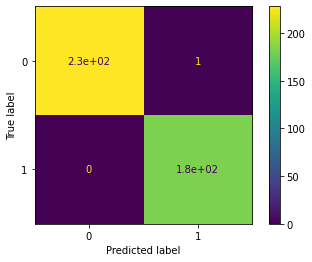

In [ ]:
# Matriz de confusão Floresta
plot_confusion_matrix(clf_floresta, X_test, y_test);

In [ ]:
clf_floresta.feature_importances_
# variance	skewness	curtosis	entropy

array([0.56464023, 0.23128966, 0.14395024, 0.06011988])

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.5f}'.format(float(clf_floresta.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 0.99757


## Modelo Support Vector Machine (SVM)

In [ ]:
# Treinando o modelo
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predição
y_predSVM = clf_svm.predict(X_test)

In [ ]:
# Report de classificação
print(classification_report(y_test, y_predFloresta, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.99563   0.99781       229
           1    0.99457   1.00000   0.99728       183

    accuracy                        0.99757       412
   macro avg    0.99728   0.99782   0.99754       412
weighted avg    0.99759   0.99757   0.99757       412



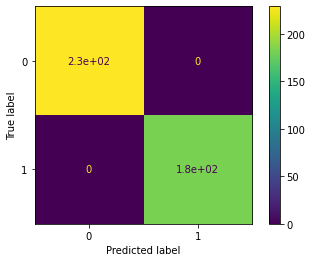

In [ ]:
# Matriz de confusão SVM
plot_confusion_matrix(clf_svm, X_test, y_test);

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.5f}'.format(float(clf_svm.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 1.00000


## Modelo Rede Neural MLP

In [ ]:
# Instanciando e treinando o modelo
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,),solver='lbfgs',random_state=1)
clf_mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Realiza a previsão
y_predMLP = clf_mlp.predict(X_test)

In [ ]:
# Report de classificação
print(classification_report(y_test, y_predMLP, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       229
           1    1.00000   1.00000   1.00000       183

    accuracy                        1.00000       412
   macro avg    1.00000   1.00000   1.00000       412
weighted avg    1.00000   1.00000   1.00000       412



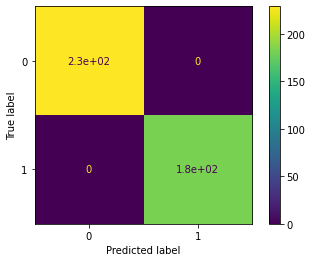

In [ ]:
# Matriz de confusão MLP
plot_confusion_matrix(clf_mlp, X_test, y_test);

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.5f}'.format(float(clf_mlp.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 1.00000
